### Author: KR
### Date: 07/27/2024

### Time Series Modeling

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:

#### 1. Plot the data with proper labeling and make some observations on the graph.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_name = 'us_retail_sales.csv'
df = pd.read_csv(file_name)

In [3]:
# Display the first few rows of the dataset
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [4]:
# Reshape the data to have a datetime index
df_melted = df.melt(id_vars='YEAR', var_name='MONTH', value_name='SALES')
df_melted['DATE'] = pd.to_datetime(df_melted['YEAR'].astype(str) + df_melted['MONTH'], format='%Y%b')
df_melted = df_melted.sort_values('DATE').set_index('DATE')

# Set the frequency to monthly start
df_melted.index.freq = 'MS'

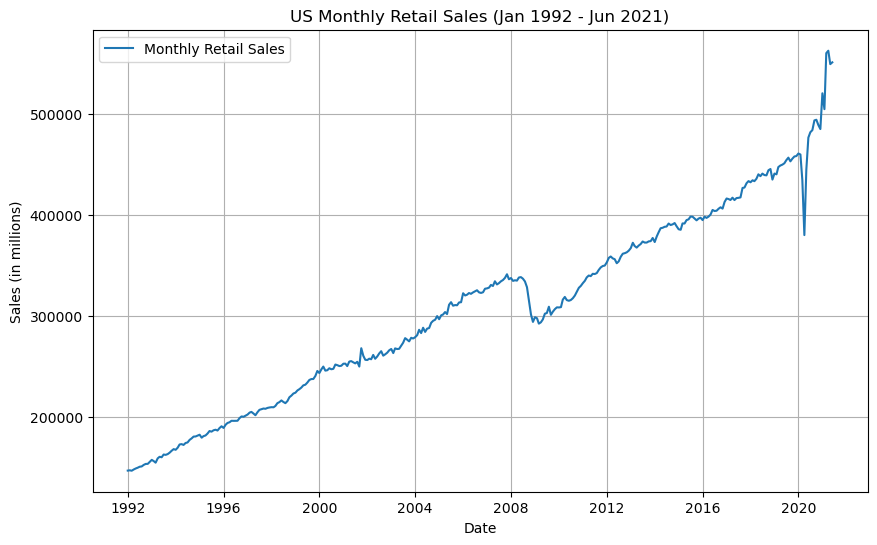

In [5]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_melted.index, df_melted['SALES'], label='Monthly Retail Sales')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.title('US Monthly Retail Sales (Jan 1992 - Jun 2021)')
plt.legend()
plt.grid(True)
plt.show()

The graph shows a steady long-term growth trend in US monthly retail sales from January 1992 to June 2021.  
  
There are regular seasonal fluctuations observable in the data, with peaks and troughs occurring roughly at the same times each year. These likely correspond to increased retail activity during the holiday season and other key shopping periods.  
  
Also, there is a noticeable dip in retail sales around 2008, which corresponds to the global financial crisis. This period shows a sharp decline followed by a recovery. And the sharp dip in early 2020 corresponds to the impact of the COVID-19 pandemic, which caused significant disruptions in retail sales. This is followed by a rapid and strong recovery, indicating resilience and a quick rebound in consumer spending.  
  
The overall trend is positive, with retail sales increasing from approximately 150,000 million USD in 1992 to over 500,000 million USD by mid-2021. This highlights the long-term growth and expansion of the retail sector in the US.

#### 2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [6]:
# Check for missing values
df_melted.isna().sum()

# Interpolating missing values
df_melted['SALES'] = df_melted['SALES'].interpolate()

# Verify no missing values remain
df_melted.isna().sum()

YEAR     0
MONTH    0
SALES    0
dtype: int64

In [7]:
# Split the data into training and test sets
train = df_melted[df_melted.index < '2020-07-01']
test = df_melted[df_melted.index >= '2020-07-01']

#### 3. Use the training set to build a predictive model for the monthly retail sales.

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Build and fit the ARIMA model
model = ARIMA(train['SALES'], order=(5, 1, 0))
model_fit = model.fit()

#### 4. Use the model to predict the monthly retail sales on the last year of data.

In [9]:
# Predict the sales for the test set
predictions = model_fit.forecast(steps=len(test))

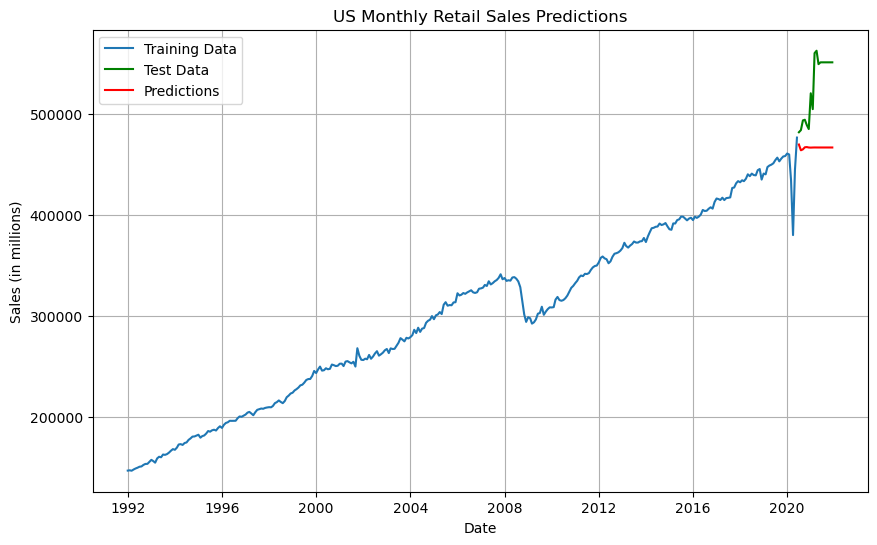

In [11]:
# Plot the predictions vs actual sales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['SALES'], label='Training Data')
plt.plot(test.index, test['SALES'], label='Test Data', color='green')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.title('US Monthly Retail Sales Predictions')
plt.legend()
plt.grid(True)
plt.show()

The ARIMA model predictions (red line) for the test period (July 2020 to June 2021) appear to be consistently lower than the actual sales. This suggests that the model might not be fully capturing the rapid post-pandemic recovery observed in the test data.  
  
The discrepancy between the predicted values and the actual sales indicates that the model may need further tuning or a different model might be more suitable to capture the recent rapid changes in retail sales.

#### 5. Report the RMSE of the model predictions on the test set.

In [13]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['SALES'], predictions))

print(f'RMSE: {rmse}')

RMSE: 67317.2985015008


The high RMSE suggests that the ARIMA model used might not be capturing the underlying patterns and recent changes in the retail sales data very well.